In [1]:
import yfinance
import numpy as np
import pandas as pd
import pandas
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

import cufflinks as cf
cf.set_config_file(offline=True)

import warnings
warnings.filterwarnings("ignore")

import datetime as dt
import matplotlib.pyplot as plt
plt.style.use("dark_background")

import pandas_datareader as web

In [2]:
from ActMng import AccountManager

In [3]:
starting_capital = 100000
allocation = 0.8

symbol = 'SPY'

long_trend_days = 12
short_trend_days = 6

In [4]:
def fetch_data(symbol:str='SPY', start_date:str='2020', end_date:str=None):
    
    if end_date is None:
        end = pandas.Timestamp.now()
    else:
        end = end_date
    
    return pdr.get_data_yahoo(symbol, pandas.Timestamp(start_date), pandas.Timestamp(end))[['Open','Close']]
df = fetch_data(symbol)

[*********************100%***********************]  1 of 1 completed


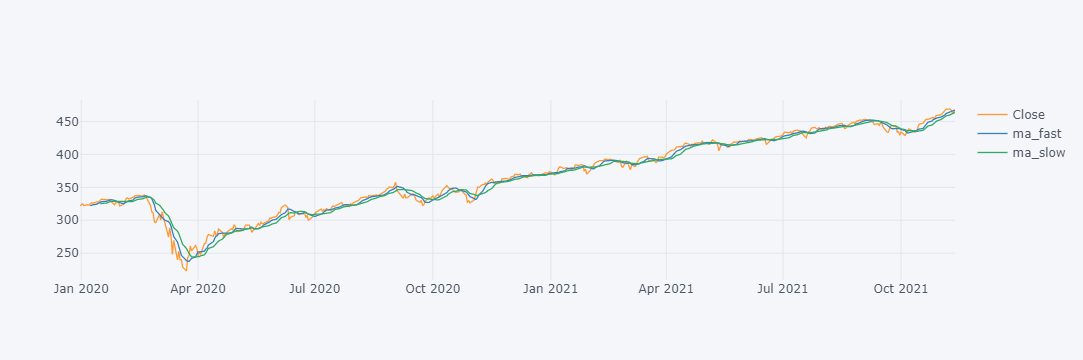

In [5]:
fast_trend = df.Open.rolling(window=short_trend_days).mean()
slow_trend = df.Open.rolling(window=long_trend_days).mean()

df['ma_fast'] = fast_trend
df['ma_slow'] = slow_trend
df[['Close','ma_fast','ma_slow']].iplot()

In [6]:
df['trade_direction'] = np.sign(fast_trend-slow_trend)
df

,Open,Close,ma_fast,ma_slow,trade_direction
Date,,,,,
2019-12-31,320.529999,321.859985,NaN,NaN,NaN
2020-01-02,323.540009,324.869995,NaN,NaN,NaN
2020-01-03,321.160004,322.410004,NaN,NaN,NaN
2020-01-06,320.489990,323.640015,NaN,NaN,NaN
2020-01-07,323.019989,322.730011,NaN,NaN,NaN
...,...,...,...,...,...
2021-11-08,469.700012,468.929993,464.359996,459.879166,1.0
2021-11-09,469.320007,467.380005,465.863332,461.228333,1.0
2021-11-10,465.579987,463.619995,466.756663,462.169998,1.0


In [7]:
#Determine the direction of the moving average differences
df_trades = df['trade_direction'].dropna().diff().dropna().apply(np.sign).astype('int8')
df_trades = pandas.DataFrame(df_trades[df_trades !=0])

#Label our intended trades
df_trades['trade'] = df['trade_direction'].map({1:'Long',-1:'Short'})
df['trades'] = df_trades['trade']


In [8]:
#Label our opening trade after removing our window period
df['trades'].replace(pandas.np.NaN,'None',inplace=True)
df = df.dropna()
df['trades'].iloc[0]=('Long' if df['trade_direction'].iloc[0]==1.0 else 'Short')
df

,Open,Close,ma_fast,ma_slow,trade_direction,trades
Date,,,,,,
2020-01-16,329.700012,330.920013,327.393341,324.670003,1.0,Long
2020-01-17,331.700012,331.950012,328.316676,325.600838,1.0,None
2020-01-21,330.899994,331.299988,328.918340,326.214170,1.0,None
2020-01-22,332.239990,331.339996,329.893336,327.137502,1.0,None
2020-01-23,330.630005,331.720001,330.420003,327.982503,1.0,None
...,...,...,...,...,...,...
2021-11-08,469.700012,468.929993,464.359996,459.879166,1.0,None
2021-11-09,469.320007,467.380005,465.863332,461.228333,1.0,None
2021-11-10,465.579987,463.619995,466.756663,462.169998,1.0,None


In [9]:
# Our trading strategy implementation - feel free to brose ActMng.py if you are curious.
trading_strategy = AccountManager(symbol=symbol,trades_df=df,starting_capital=starting_capital,allocation_amount=allocation)
results = trading_strategy.run()

In [10]:
#Here we can see a day by day breakdown of the account
results['result_df']

,Open,Close,ma_fast,ma_slow,trade_direction,trades,account_val,cash_bal,position,position_changes,fees
2020-01-16,329.700012,330.920013,327.393341,324.670003,1.0,Long,100295.021096,20000.589038,242.64,242.64,1.0
2020-01-17,331.700012,331.950012,328.316676,325.600838,1.0,None,100544.940000,20000.589038,242.64,0.00,0.0
2020-01-21,330.899994,331.299988,328.918340,326.214170,1.0,None,100387.218076,20000.589038,242.64,0.00,0.0
2020-01-22,332.239990,331.339996,329.893336,327.137502,1.0,None,100396.925750,20000.589038,242.64,0.00,0.0
2020-01-23,330.630005,331.720001,330.420003,327.982503,1.0,None,100489.130134,20000.589038,242.64,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2021-11-08,469.700012,468.929993,464.359996,459.879166,1.0,None,136505.079669,25682.854500,236.33,0.00,0.0
2021-11-09,469.320007,467.380005,465.863332,461.228333,1.0,None,136138.771054,25682.854500,236.33,0.00,0.0
2021-11-10,465.579987,463.619995,466.756663,462.169998,1.0,None,135250.167946,25682.854500,236.33,0.00,0.0
2021-11-11,465.209991,463.769989,467.408330,462.837496,1.0,None,135285.616004,25682.854500,236.33,0.00,0.0


In [11]:
# Here are our simulated orders as we would submit to an API endpoint for algorthmic trading. 
results['broker_orders']

,symbol,date,time,order,order_type,price,size,exchange_fees
2020-01-16,SPY,2020-01-16 00:00:00,At Market Open,BUY,MARKET,329.700012,242.64,1.0
2020-01-29,SPY,2020-01-29 00:00:00,At Market Open,SELL,MARKET,328.380005,242.64,1.0
2020-01-29,SPY,2020-01-29 00:00:00,At Market Open,SELL,MARKET,328.380005,242.84,1.0
2020-02-07,SPY,2020-02-07 00:00:00,At Market Open,BUY,MARKET,332.820007,242.84,1.0
2020-02-07,SPY,2020-02-07 00:00:00,At Market Open,BUY,MARKET,332.820007,237.00,1.0
...,...,...,...,...,...,...,...,...
2021-09-14,SPY,2021-09-14 00:00:00,At Market Open,SELL,MARKET,448.119995,223.86,1.0
2021-09-14,SPY,2021-09-14 00:00:00,At Market Open,SELL,MARKET,448.119995,223.90,1.0
2021-10-13,SPY,2021-10-13 00:00:00,At Market Open,BUY,MARKET,434.709991,223.90,1.0
2021-10-13,SPY,2021-10-13 00:00:00,At Market Open,BUY,MARKET,434.709991,236.33,1.0


absolute_return_tf: %0.36
CAGR_tf: %0.18
information_ratio_tf: %0.0636


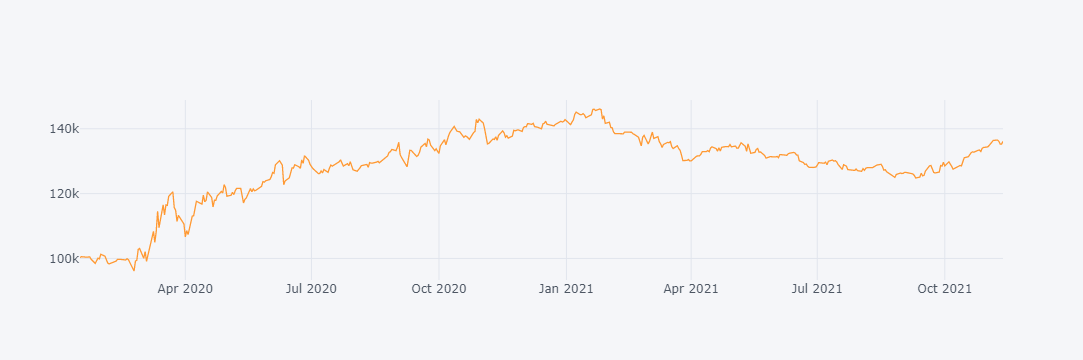

In [12]:
#Todo:

r_df = results['result_df']

# Calculate the Absolute Return of our trend-following trading strategy
absolute_return_tf = (r_df['account_val'].iloc[-1]-starting_capital)/starting_capital
print(f"absolute_return_tf: %{np.round(absolute_return_tf,2)}")

# Calculate the CAGR or our trend-following trading strategy
CAGR_tf = (r_df['account_val'].iloc[-1]/starting_capital)**(252/len(df))-1
print(f"CAGR_tf: %{np.round(CAGR_tf,2)}")

# Calculate the IR (Sharpe without RF-rate) of our trend-following trading strategy
information_ratio_tf = r_df.account_val.pct_change().mean()/r_df.account_val.pct_change().std()
print(f"information_ratio_tf: %{np.round(information_ratio_tf,4)}")

#Plot the equity curve (hint: use 'account_val')
r_df.account_val.iplot()

absolute_return_bh: %41.73
CAGR_bh: %0.18
information_ratio_tf: %0.0636


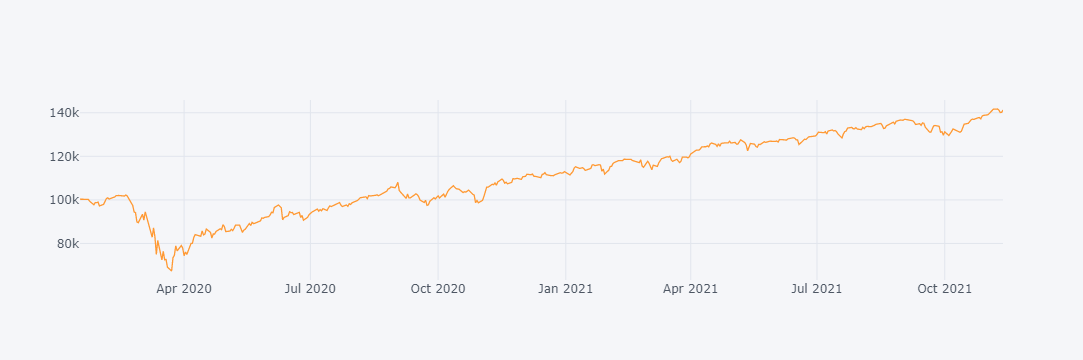

In [13]:
#Todo:
p_df = results['broker_orders']
# Calculate the Absolute Return of a buy-and-hold strategy in the same period
absolute_return_bh = absolute_return_bh = (r_df['Close'].iloc[-1]-r_df['Open'].iloc[0])/r_df['Open'].iloc[0]*100
print(f"absolute_return_bh: %{np.round(absolute_return_bh,2)}")

# Calculate the CAGR or our trend-following trading strategy
CAGR_bh = (p_df['price'].iloc[-1]/p_df['price'].iloc[0])**(356/(r_df.index[-1]-r_df.index[0]).days)-1
print(f"CAGR_bh: %{np.round(CAGR_tf,2)}")

# Calculate the IR (Sharpe without RF-rate) of our trend-following trading strategy
information_ratio_bh = r_df.Close.pct_change().mean()/r_df.Close.pct_change().std()
print(f"information_ratio_tf: %{np.round(information_ratio_tf,4)}")

#Plot the equity curve (hint: use 'close' returns and your initial capital value to generate an equity curve)
((r_df.Close.pct_change().dropna()+1).cumprod()*starting_capital).iplot()

In [14]:
#Todo - optional, below:
# Copy any of the code from above to new cells below, and see how changing the symbol, dates and trend parameters changes the performance
# Can you beat the reference implementation?


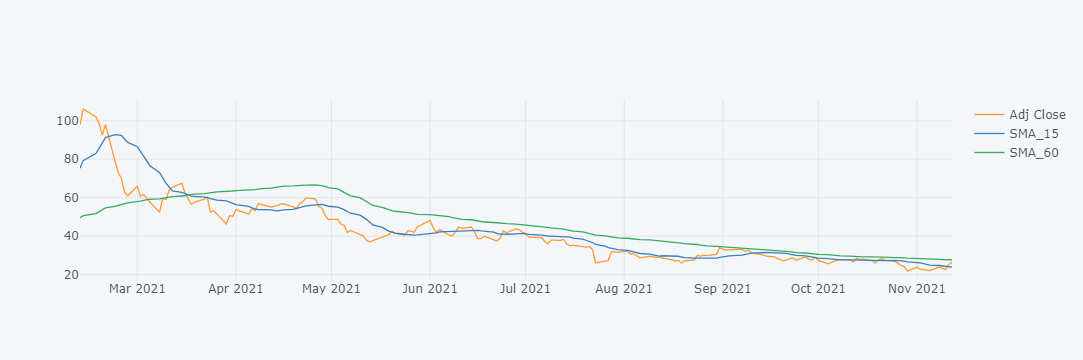

In [15]:
MovingA_1 = 15 #35-days as moving average 
MovingA_2 = 60 #100-days as moving average 

start = dt.datetime.now() - dt.timedelta(days=365) #start period
end = dt.datetime.now() #end period

data = web.DataReader('API', 'yahoo', start, end)
data[f'SMA_{MovingA_1}'] = data['Adj Close'].rolling(window=MovingA_1).mean()
data[f'SMA_{MovingA_2}'] = data['Adj Close'].rolling(window=MovingA_2).mean()

data = data.iloc[MovingA_2:]

data[['Adj Close',f'SMA_{MovingA_1}',f'SMA_{MovingA_2}']].iplot()



In [16]:
buy_signals =[]
sell_signals =[]
trigger = 0

for x in range (len(data)):
    if data[f'SMA_{MovingA_1}'].iloc[x]>data[f'SMA_{MovingA_2}'].iloc[x] and trigger !=1:
        buy_signals.append(data['Adj Close'].iloc[x])
        sell_signals.append(float('nan'))
        trigger = 1
        
    elif data[f'SMA_{MovingA_1}'].iloc[x]<data[f'SMA_{MovingA_2}'].iloc[x] and trigger !=-1:
        buy_signals.append(float('nan'))
        sell_signals.append(data['Adj Close'].iloc[x])
        trigger = -1
    else:
        buy_signals.append(float('nan'))
        sell_signals.append(float('nan'))
        
data['Buy Signals'] = buy_signals
data['Sell Signals'] = sell_signals

data
        

,High,Low,Open,Close,Volume,Adj Close,SMA_15,SMA_60,Buy Signals,Sell Signals
Date,,,,,,,,,,
2021-02-11,98.599998,90.599998,91.730003,97.860001,1149900,97.860001,75.297667,49.498084,97.860001,NaN
2021-02-12,107.494003,95.529999,95.779999,106.139999,1188500,106.139999,79.281667,50.575917,NaN,NaN
2021-02-16,114.964996,99.519997,111.500000,102.059998,1524200,102.059998,82.933666,51.660584,NaN,NaN
2021-02-17,100.040001,94.430000,97.239998,98.620003,1271900,98.620003,85.834333,52.718750,NaN,NaN
2021-02-18,94.800003,90.000000,92.080002,92.540001,1493400,92.540001,88.389000,53.661250,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-11-08,23.860001,22.020000,22.020000,23.780001,869700,23.780001,24.651333,27.847500,NaN,NaN
2021-11-09,24.000000,22.930000,23.910000,23.250000,437500,23.250000,24.468000,27.774000,NaN,NaN
2021-11-10,24.625000,22.490000,23.240000,22.510000,1358000,22.510000,24.120667,27.697167,NaN,NaN


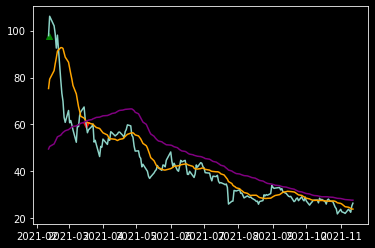

In [17]:


plt.plot(data['Adj Close'], label="Adj Close")
plt.plot(data[f'SMA_{MovingA_1}'], label=f"SMA_{MovingA_1}", color="orange")
plt.plot(data[f'SMA_{MovingA_2}'], label=f"SMA_{MovingA_2}",color="purple")
plt.scatter(data.index, data['Buy Signals'], label="Buy Signals", marker="^",color="Green")
plt.scatter(data.index, data['Sell Signals'], label="Sell Signals", marker="v",color="Red")
plt.show()
 